In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
data = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
data2 = data.copy()

In [ ]:
data["Month"] = pd.to_datetime(data["Month"],format='%Y-%m')
data.index = data["Month"]
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
data = data.drop("Month",axis=1)

<Axes: xlabel='Month'>

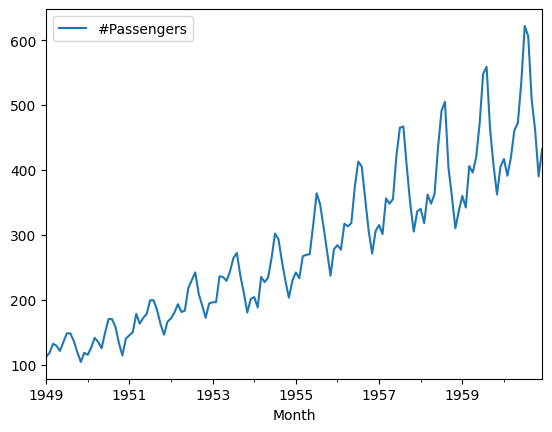

In [ ]:
data.plot()

In [ ]:
data2["Month"] = pd.to_datetime(data2["Month"],format='%Y-%m')
data2.index = data2["Month"]
data2 = data2.drop('Month',axis=1)

In [ ]:
decomposition = seasonal_decompose(data2,model="multplicative")

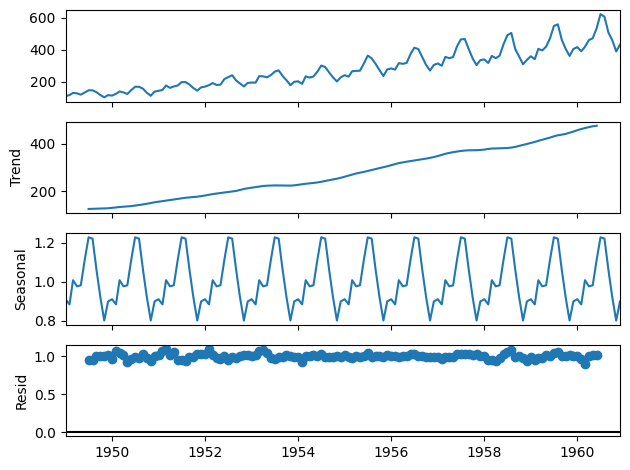

In [ ]:
decomposition.plot()
plt.show()

<Axes: xlabel='Month'>

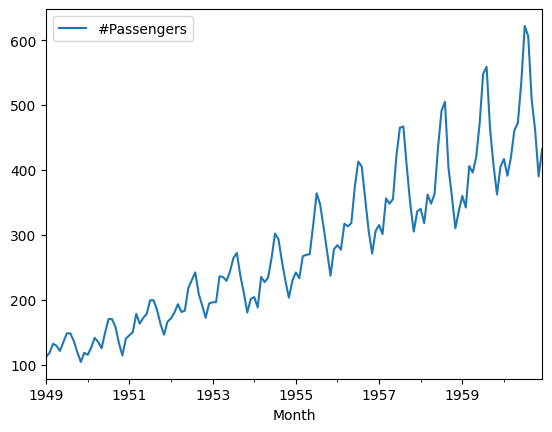

In [ ]:
data2.plot()

<Axes: xlabel='Month'>

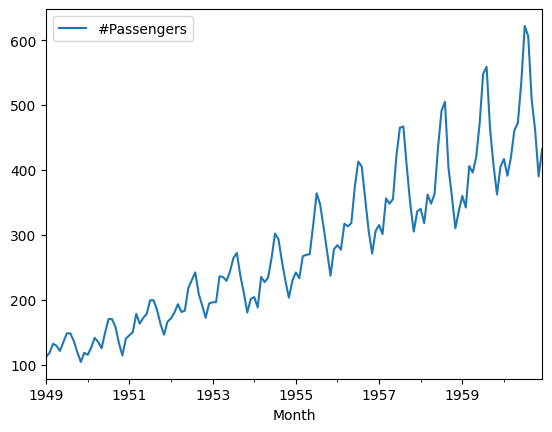

In [ ]:
data2.plot()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
data.head(50)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
data["1 Month before"] = data["#Passengers"].shift(+1)
data["2 Month before"] = data["#Passengers"].shift(+2)
data["3 Month before"] = data["#Passengers"].shift(+3)
data["4 Month before"] = data["#Passengers"].shift(+4)

In [ ]:
data.head(15)

,#Passengers,1 Month before,2 Month before,3 Month before,4 Month before
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN
1949-05-01,121,129.0,132.0,118.0,112.0
1949-06-01,135,121.0,129.0,132.0,118.0
1949-07-01,148,135.0,121.0,129.0,132.0
1949-08-01,148,148.0,135.0,121.0,129.0
1949-09-01,136,148.0,148.0,135.0,121.0


In [ ]:
data = data.iloc[4:]
# data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 1949-05-01 to 1960-12-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #Passengers     140 non-null    int64  
 1   1 Month before  140 non-null    float64
 2   2 Month before  140 non-null    float64
 3   3 Month before  140 non-null    float64
 4   4 Month before  140 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.6 KB


In [ ]:
data["#Passengers"] = data["#Passengers"].astype("float64")

/tmp/ipykernel_24/1008179382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["#Passengers"] = data["#Passengers"].astype("float64")


In [ ]:
data.head(50)

,#Passengers,1 Month before,2 Month before,3 Month before,4 Month before
Month,,,,,
1949-05-01,121.0,129.0,132.0,118.0,112.0
1949-06-01,135.0,121.0,129.0,132.0,118.0
1949-07-01,148.0,135.0,121.0,129.0,132.0
1949-08-01,148.0,148.0,135.0,121.0,129.0
1949-09-01,136.0,148.0,148.0,135.0,121.0
1949-10-01,119.0,136.0,148.0,148.0,135.0
1949-11-01,104.0,119.0,136.0,148.0,148.0
1949-12-01,118.0,104.0,119.0,136.0,148.0
1950-01-01,115.0,118.0,104.0,119.0,136.0


In [ ]:
X = data[["#Passengers","1 Month before","2 Month before","3 Month before"]].values
X

array([[121., 129., 132., 118.],
       [135., 121., 129., 132.],
       [148., 135., 121., 129.],
       [148., 148., 135., 121.],
       [136., 148., 148., 135.],
       [119., 136., 148., 148.],
       [104., 119., 136., 148.],
       [118., 104., 119., 136.],
       [115., 118., 104., 119.],
       [126., 115., 118., 104.],
       [141., 126., 115., 118.],
       [135., 141., 126., 115.],
       [125., 135., 141., 126.],
       [149., 125., 135., 141.],
       [170., 149., 125., 135.],
       [170., 170., 149., 125.],
       [158., 170., 170., 149.],
       [133., 158., 170., 170.],
       [114., 133., 158., 170.],
       [140., 114., 133., 158.],
       [145., 140., 114., 133.],
       [150., 145., 140., 114.],
       [178., 150., 145., 140.],
       [163., 178., 150., 145.],
       [172., 163., 178., 150.],
       [178., 172., 163., 178.],
       [199., 178., 172., 163.],
       [199., 199., 178., 172.],
       [184., 199., 199., 178.],
       [162., 184., 199., 199.],
       [14

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train[0].shape

(4,)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.929945869875717

In [ ]:
import tensorflow as tf

model_d = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,),batch_size=None,),
    tf.keras.layers.Dense(1),
])
model_d.compile(optimizer="adam",loss="mse")
model_d.summary()

2024-05-03 11:35:10.280510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 11:35:10.280607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 11:35:10.447121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_d.fit(X_train,Y_train,epochs=10)


Epoch 1/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 183100.8438

I0000 00:00:1714736123.430093      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 192501.1719
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191707.0469 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187822.6719 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179690.5156 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177338.4531 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174597.0156 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174409.0781 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168786.3594 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172983.0781 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156559.6719 


In [ ]:
pre_d = model_d.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [ ]:
def testset(num):
    print(f"Predicted Number is {int(model_d.predict(X_test[num].reshape(1,-1)))}")
    print(f"Actual Number is {int(Y_test[num])}")
testset(9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Number is -20
Actual Number is 136


/tmp/ipykernel_24/1857069663.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Number is {int(model_d.predict(X_test[num].reshape(1,-1)))}")
/tmp/ipykernel_24/1857069663.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual Number is {int(Y_test[num])}")


In [ ]:
def makepredictions(n1,n2,n3,n4):
    predict_array = np.array([n1,n2,n3,n4]).reshape(1,-1)
    prediction = model_d.predict(predict_array)
    print(f"Next number is {round(int(prediction))}")
makepredictions(1,1,1,10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Next number is 5


/tmp/ipykernel_24/3735545600.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Next number is {round(int(prediction))}")


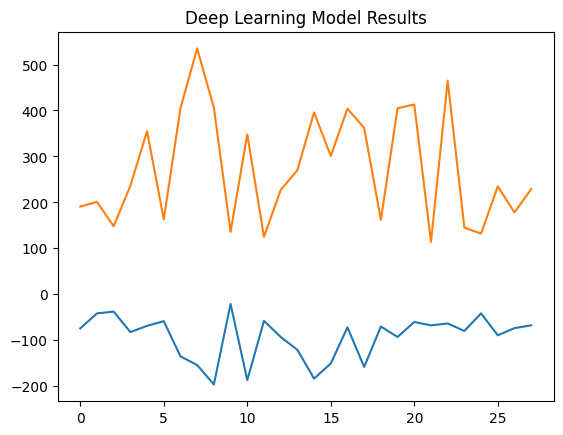

In [ ]:
plt.title("Deep Learning Model Results")
plt.plot(pre_d)
plt.plot(Y_test)

In [ ]:
pre = model.predict(X_test)


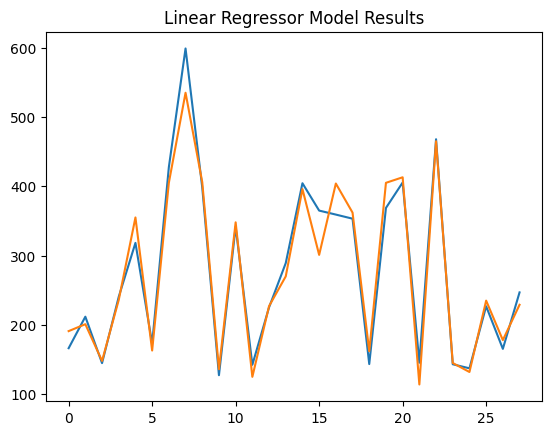

In [ ]:
# Visualizing both prediction and actual of Linear Regression
plt.title("Linear Regressor Model Results")
plt.plot(pre)
plt.plot(Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pre,Y_test )

612.8230172202136

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pre,Y_test )

18.048051044827957